In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#To display all the columns and rows
pd.set_option('display.max_columns', 1000);
pd.set_option('display.max_rows', 1000);
pd.set_option('display.width', 1000);
#To ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#To supress scientific notations
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Cleaning and merging 2021 and 2022 files with substance users and non users

In [3]:
#Importing the 2021 file
data1 = pd.read_excel("/content/drive/MyDrive/Capstone_Project/2021_sa.xlsx")

In [4]:
#Importing the 2022 file
data2 = pd.read_excel("/content/drive/MyDrive/Capstone_Project/2022_sa.xlsx")

Data Cleaning round 1 - here columns that are not required are dropped based on different research papers on substance abuse and kaggle worksheets

In [5]:
data1.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12784 entries, 0 to 12783
Data columns (total 303 columns):
 #    Column    Non-Null Count  Dtype  
---   ------    --------------  -----  
 0    _STATE    12784 non-null  int64  
 1    FMONTH    12784 non-null  int64  
 2    IDATE     12784 non-null  int64  
 3    IMONTH    12784 non-null  int64  
 4    IDAY      12784 non-null  int64  
 5    IYEAR     12784 non-null  int64  
 6    DISPCODE  12784 non-null  int64  
 7    SEQNO     12784 non-null  int64  
 8    _PSU      12784 non-null  int64  
 9    CTELENM1  5558 non-null   float64
 10   PVTRESD1  5558 non-null   float64
 11   COLGHOUS  1 non-null      float64
 12   STATERE1  5558 non-null   float64
 13   CELPHON1  5558 non-null   float64
 14   LADULT1   5558 non-null   float64
 15   COLGSEX   1 non-null      float64
 16   NUMADULT  5558 non-null   float64
 17   LANDSEX   2261 non-null   float64
 18   NUMMEN    3388 non-null   float64
 19   NUMWOMEN  3388 non-null   float64
 20   RESP

In [6]:
data1.drop(['DISPCODE'], axis=1, inplace=True)
data1.drop(['_PSU'], axis=1, inplace=True)
data1.drop(['CTELENM1'], axis=1, inplace=True)
data1.drop(['COLGHOUS'], axis=1, inplace=True)
data1.drop(['SAFETIME'], axis=1, inplace=True)
data1.drop(['CTELNUM1'], axis=1, inplace=True)
data1.drop(['CELLFON5'], axis=1, inplace=True)
data1.drop(['NUMHHOL3'], axis=1, inplace=True)
data1.drop(['NUMPHON3'], axis=1, inplace=True)
data1.drop(['INSULIN1'], axis=1, inplace=True)
data1.drop(['BLDSUGAR'], axis=1, inplace=True)
data1.drop(['FEETCHK3'], axis=1, inplace=True)
data1.drop(['DOCTDIAB'], axis=1, inplace=True)
data1.drop(['CHKHEMO3'], axis=1, inplace=True)
data1.drop(['FEETCHK'], axis=1, inplace=True)
data1.drop(['EYEEXAM1'], axis=1, inplace=True)
data1.drop(['DIABEYE'], axis=1, inplace=True)
data1.drop(['DIABEDU'], axis=1, inplace=True)
data1.drop(['TOLDCFS'], axis=1, inplace=True)
data1.drop(['HAVECFS'], axis=1, inplace=True)
data1.drop(['WORKCFS'], axis=1, inplace=True)
data1.drop(['TOLDHEPC'], axis=1, inplace=True)
data1.drop(['TRETHEPC'], axis=1, inplace=True)
data1.drop(['PRIRHEPC'], axis=1, inplace=True)
data1.drop(['HAVEHEPC'], axis=1, inplace=True)
data1.drop(['HAVEHEPB'], axis=1, inplace=True)
data1.drop(['MEDSHEPB'], axis=1, inplace=True)
data1.drop(['HPVADVC4'], axis=1, inplace=True)
data1.drop(['HPVADSHT'], axis=1, inplace=True)
data1.drop(['TETANUS1'], axis=1, inplace=True)
data1.drop(['SHINGLE2'], axis=1, inplace=True)
data1.drop(['LCSFIRST'], axis=1, inplace=True)
data1.drop(['LCSLAST'], axis=1, inplace=True)
data1.drop(['LCSNUMCG'], axis=1, inplace=True)
data1.drop(['LCSCTSCN'], axis=1, inplace=True)
data1.drop(['HADMAM'], axis=1, inplace=True)
data1.drop(['HOWLONG'], axis=1, inplace=True)
data1.drop(['CERVSCRN'], axis=1, inplace=True)
data1.drop(['CRVCLCNC'], axis=1, inplace=True)
data1.drop(['CRVCLPAP'], axis=1, inplace=True)
data1.drop(['CRVCLHPV'], axis=1, inplace=True)
data1.drop(['HADHYST2'], axis=1, inplace=True)
data1.drop(['PSATEST1'], axis=1, inplace=True)
data1.drop(['PSATIME1'], axis=1, inplace=True)
data1.drop(['PCPSARS2'], axis=1, inplace=True)
data1.drop(['PCSTALK'], axis=1, inplace=True)
data1.drop(['HADSIGM4'], axis=1, inplace=True)
data1.drop(['COLNSIGM'], axis=1, inplace=True)
data1.drop(['COLNTES1'], axis=1, inplace=True)
data1.drop(['SIGMTES1'], axis=1, inplace=True)
data1.drop(['LASTSIG4'], axis=1, inplace=True)
data1.drop(['COLNCNCR'], axis=1, inplace=True)
data1.drop(['VIRCOLO1'], axis=1, inplace=True)
data1.drop(['VCLNTES1'], axis=1, inplace=True)
data1.drop(['SMALSTOL'], axis=1, inplace=True)
data1.drop(['STOLTEST'], axis=1, inplace=True)
data1.drop(['STOOLDN1'], axis=1, inplace=True)
data1.drop(['BLDSTFIT'], axis=1, inplace=True)
data1.drop(['SDNATES1'], axis=1, inplace=True)
data1.drop(['CNCRDIFF'], axis=1, inplace=True)
data1.drop(['CNCRAGE'], axis=1, inplace=True)
data1.drop(['CNCRTYP1'], axis=1, inplace=True)
data1.drop(['CSRVTRT3'], axis=1, inplace=True)
data1.drop(['CSRVDOC1'], axis=1, inplace=True)
data1.drop(['CSRVSUM'], axis=1, inplace=True)
data1.drop(['CSRVRTRN'], axis=1, inplace=True)
data1.drop(['CSRVINST'], axis=1, inplace=True)
data1.drop(['CSRVINSR'], axis=1, inplace=True)
data1.drop(['CSRVDEIN'], axis=1, inplace=True)
data1.drop(['CSRVCLIN'], axis=1, inplace=True)
data1.drop(['CSRVPAIN'], axis=1, inplace=True)
data1.drop(['CSRVCTL2'], axis=1, inplace=True)
data1.drop(['HOMBPCHK'], axis=1, inplace=True)
data1.drop(['HOMRGCHK'], axis=1, inplace=True)
data1.drop(['WHEREBP'], axis=1, inplace=True)
data1.drop(['SHAREBP'], axis=1, inplace=True)
data1.drop(['RCSGENDR'], axis=1, inplace=True)
data1.drop(['RCSRLTN2'], axis=1, inplace=True)
data1.drop(['CASTHDX2'], axis=1, inplace=True)
data1.drop(['CASTHNO2'], axis=1, inplace=True)
data1.drop(['MSCODE'], axis=1, inplace=True)
data1.drop(['_STSTR'], axis=1, inplace=True)
data1.drop(['_STRWT'], axis=1, inplace=True)
data1.drop(['_RAWRAKE'], axis=1, inplace=True)
data1.drop(['_WT2RAKE'], axis=1, inplace=True)
data1.drop(['_CHISPNC'], axis=1, inplace=True)
data1.drop(['_CRACE1'], axis=1, inplace=True)
data1.drop(['_CPRACE1'], axis=1, inplace=True)
data1.drop(['CAGEG'], axis=1, inplace=True)
data1.drop(['_CLLCPWT'], axis=1, inplace=True)
data1.drop(['_DUALUSE'], axis=1, inplace=True)
data1.drop(['_DUALCOR'], axis=1, inplace=True)
data1.drop(['_LLCPWT2'], axis=1, inplace=True)
data1.drop(['_LLCPWT'], axis=1, inplace=True)

In [7]:
data1.shape

(12784, 209)

In [8]:
data2.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18276 entries, 0 to 18275
Data columns (total 327 columns):
 #    Column      Non-Null Count  Dtype  
---   ------      --------------  -----  
 0    Unnamed: 0  18276 non-null  int64  
 1    _STATE      18276 non-null  int64  
 2    FMONTH      18276 non-null  int64  
 3    IDATE       18276 non-null  int64  
 4    IMONTH      18276 non-null  int64  
 5    IDAY        18276 non-null  int64  
 6    IYEAR       18276 non-null  int64  
 7    DISPCODE    18276 non-null  int64  
 8    SEQNO       18276 non-null  int64  
 9    _PSU        18276 non-null  int64  
 10   CTELENM1    5046 non-null   float64
 11   PVTRESD1    5046 non-null   float64
 12   COLGHOUS    1 non-null      float64
 13   STATERE1    5046 non-null   float64
 14   CELPHON1    5046 non-null   float64
 15   LADULT1     5046 non-null   float64
 16   COLGSEX1    1 non-null      float64
 17   NUMADULT    5045 non-null   float64
 18   LANDSEX1    2256 non-null   float64
 19   NU

In [9]:
data2.drop(['Unnamed: 0'], axis=1, inplace=True)
data2.drop(['DISPCODE'], axis=1, inplace=True)
data2.drop(['_PSU'], axis=1, inplace=True)
data2.drop(['CTELENM1'], axis=1, inplace=True)
data2.drop(['COLGHOUS'], axis=1, inplace=True)
data2.drop(['SAFETIME'], axis=1, inplace=True)
data2.drop(['CTELNUM1'], axis=1, inplace=True)
data2.drop(['CELLFON5'], axis=1, inplace=True)
data2.drop(['INSULIN1'], axis=1, inplace=True)
data2.drop(['CHKHEMO3'], axis=1, inplace=True)
data2.drop(['EYEEXAM1'], axis=1, inplace=True)
data2.drop(['DIABEYE1'], axis=1, inplace=True)
data2.drop(['DIABEDU1'], axis=1, inplace=True)
data2.drop(['TOLDCFS'], axis=1, inplace=True)
data2.drop(['HAVECFS'], axis=1, inplace=True)
data2.drop(['WORKCFS'], axis=1, inplace=True)
data2.drop(['HPVADVC4'], axis=1, inplace=True)
data2.drop(['HPVADSHT'], axis=1, inplace=True)
data2.drop(['TETANUS1'], axis=1, inplace=True)
data2.drop(['SHINGLE2'], axis=1, inplace=True)
data2.drop(['LCSFIRST'], axis=1, inplace=True)
data2.drop(['LCSLAST'], axis=1, inplace=True)
data2.drop(['LCSNUMCG'], axis=1, inplace=True)
data2.drop(['HADMAM'], axis=1, inplace=True)
data2.drop(['HOWLONG'], axis=1, inplace=True)
data2.drop(['CERVSCRN'], axis=1, inplace=True)
data2.drop(['CRVCLCNC'], axis=1, inplace=True)
data2.drop(['CRVCLPAP'], axis=1, inplace=True)
data2.drop(['CRVCLHPV'], axis=1, inplace=True)
data2.drop(['HADHYST2'], axis=1, inplace=True)
data2.drop(['PSATEST1'], axis=1, inplace=True)
data2.drop(['PSATIME1'], axis=1, inplace=True)
data2.drop(['PCPSARS2'], axis=1, inplace=True)
data2.drop(['HADSIGM4'], axis=1, inplace=True)
data2.drop(['COLNSIGM'], axis=1, inplace=True)
data2.drop(['COLNTES1'], axis=1, inplace=True)
data2.drop(['SIGMTES1'], axis=1, inplace=True)
data2.drop(['LASTSIG4'], axis=1, inplace=True)
data2.drop(['COLNCNCR'], axis=1, inplace=True)
data2.drop(['VIRCOLO1'], axis=1, inplace=True)
data2.drop(['SMALSTOL'], axis=1, inplace=True)
data2.drop(['STOLTEST'], axis=1, inplace=True)
data2.drop(['BLDSTFIT'], axis=1, inplace=True)
data2.drop(['SDNATES1'], axis=1, inplace=True)
data2.drop(['CNCRDIFF'], axis=1, inplace=True)
data2.drop(['CNCRAGE'], axis=1, inplace=True)
data2.drop(['CSRVTRT3'], axis=1, inplace=True)
data2.drop(['CSRVDOC1'], axis=1, inplace=True)
data2.drop(['CSRVSUM'], axis=1, inplace=True)
data2.drop(['CSRVRTRN'], axis=1, inplace=True)
data2.drop(['CSRVINST'], axis=1, inplace=True)
data2.drop(['CSRVINSR'], axis=1, inplace=True)
data2.drop(['CSRVDEIN'], axis=1, inplace=True)
data2.drop(['CSRVCLIN'], axis=1, inplace=True)
data2.drop(['CSRVPAIN'], axis=1, inplace=True)
data2.drop(['CSRVCTL2'], axis=1, inplace=True)
data2.drop(['RCSGEND1'], axis=1, inplace=True)
data2.drop(['RCSRLTN2'], axis=1, inplace=True)
data2.drop(['CASTHDX2'], axis=1, inplace=True)
data2.drop(['CASTHNO2'], axis=1, inplace=True)
data2.drop(['MSCODE'], axis=1, inplace=True)
data2.drop(['_STSTR'], axis=1, inplace=True)
data2.drop(['_STRWT'], axis=1, inplace=True)
data2.drop(['_RAWRAKE'], axis=1, inplace=True)
data2.drop(['_WT2RAKE'], axis=1, inplace=True)
data2.drop(['_CHISPNC'], axis=1, inplace=True)
data2.drop(['_CRACE2'], axis=1, inplace=True)
data2.drop(['_CPRACE2'], axis=1, inplace=True)
data2.drop(['CAGEG'], axis=1, inplace=True)
data2.drop(['_CLLCPWT'], axis=1, inplace=True)
data2.drop(['_DUALUSE'], axis=1, inplace=True)
data2.drop(['_DUALCOR'], axis=1, inplace=True)
data2.drop(['_LLCPWT2'], axis=1, inplace=True)
data2.drop(['_LLCPWT'], axis=1, inplace=True)

In [10]:
data2.shape

(18276, 253)

Data Cleaning round 2 - After this only the columns which are present in both the dataset are used, others are being dropped. This is required for merging both the files.

In [11]:
#Removing features based on indexes from 2021 file
data1.drop(data1.columns[[34,35,36,37,38,50,52,53,54,55,56,60,88,89,90,91,92,93,94,96,97,149,150,151,156,
                          157,158,163,164,165,184,191,192,193,194,195,196,197,198,199,200,201,202,203,204,
                          205,206,207,208]],axis=1, inplace=True)

In [12]:
data1.drop(['RSNMRJN2'], axis=1, inplace=True)

In [13]:
data1.shape

(12784, 159)

In [14]:
#Removing features based on indexes from 2022 file
data2.drop(data2.columns[[34,35,36,49,53,54,55,69,70,75,76,77,87,88,89,90,91,93,94,96,97,98,99,100,101,102,
                          103,104,105,106,107,136,137,138,139,140,141,142,143,144,145,147,148,149,150,151,
                          155,156,157,158,159,160,161,162,166,171,172,173,174,175,176,177,178,179,180,181,
                          182,183,195,196,197,202,207,208,209,224,225,226,227,228,229,230,231,232,233,234,
                          235,239,240,241,242,243,244,246]],axis=1, inplace=True)

In [15]:
data2.shape

(18276, 159)

In [16]:
#Renaming similar features with similar column names in 2022 dataset
data2.rename(columns = {'COLGSEX1':'COLGSEX', 'LANDSEX1':'LANDSEX', 'CELLSEX1':'CELLSEX', 'CHCSCNC1':'CHCSCNCR',
                        'CHCOCNC1':'CHCOCNCR', 'HAVARTH4':'HAVARTH5', 'ECIGNOW2':'ECIGNOW1', 'ALCDAY4':'ALCDAY5'
                        , 'PREDIAB2':'PREDIAB1', 'IMFVPLA3':'IMFVPLA2', 'USEMRJN4':'USEMRJN3',
                        '_PRACE2':'_PRACE1', '_MRACE2':'_MRACE1', '_RACE1':'_RACE', '_CURECI2':'_CURECI1',
                        'DRNKANY6':'DRNKANY5', '_RFBING6':'_RFBING5', '_DRNKWK2':'_DRNKWK1',
                        '_RFDRHV8':'_RFDRHV7'}, inplace = True)

In [17]:
print(data1.columns)

Index(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'SEQNO', 'PVTRESD1', 'STATERE1', 'CELPHON1',
       ...
       '_SMOKER3', '_RFSMOK3', '_CURECI1', 'DRNKANY5', '_RFBING5', '_DRNKWK1', '_RFDRHV7', '_FLSHOT7', '_PNEUMO3', '_AIDTST4'], dtype='object', length=159)


In [18]:
print(data2.columns)

Index(['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'SEQNO', 'PVTRESD1', 'STATERE1', 'CELPHON1',
       ...
       '_SMOKER3', '_RFSMOK3', '_CURECI1', 'DRNKANY5', '_RFBING5', '_DRNKWK1', '_RFDRHV7', '_FLSHOT7', '_PNEUMO3', '_AIDTST4'], dtype='object', length=159)


In [19]:
#1. Marijuana abusers
data1['MARIJ_ABUSER'] = [0 if ((x == 88) or (x<20)) else 1 for x in data1['MARIJAN1']]
#2. E-cigarettes abusers
data1['ECIG_ABUSER'] = [1 if (x == 1) else 0 for x in data1['ECIGNOW1']]
#3. Tobacco abusers
data1['TOBA_ABUSER'] = [1 if (x == 1) else 0 for x in data1['USENOW3']]
#4. Alcohol abusers
data1['ALCO_ABUSER'] = [0 if ((x == 888) or (x>200 and x<220) or (x>100 and x<105)) else 1 for x in data1['ALCDAY5']]
#Categories of abusers
data1['LEVEL_ABUSER'] = data1['MARIJ_ABUSER']+data1['ECIG_ABUSER']+data1['TOBA_ABUSER']+data1['ALCO_ABUSER']
#Creating the target column whether the participant is a substance abuser or not
data1['TARGET_ABUSER'] = [0 if (x == 0) else 1 for x in data1['LEVEL_ABUSER']]

In [20]:
#1. Marijuana abusers
data2['MARIJ_ABUSER'] = [0 if ((x == 88) or (x<20)) else 1 for x in data2['MARIJAN1']]
#2. E-cigarettes abusers
data2['ECIG_ABUSER'] = [1 if (x == 2) else 0 for x in data2['ECIGNOW1']]
#3. Tobacco abusers
data2['TOBA_ABUSER'] = [1 if (x == 1) else 0 for x in data2['USENOW3']]
#4. Alcohol abusers
data2['ALCO_ABUSER'] = [0 if ((x == 888) or (x>200 and x<220) or (x>100 and x<105)) else 1 for x in data2['ALCDAY5']]
#Categories of abusers
data2['LEVEL_ABUSER'] = data2['MARIJ_ABUSER']+data2['ECIG_ABUSER']+data2['TOBA_ABUSER']+data2['ALCO_ABUSER']
#Creating the target column whether the participant is a substance abuser or not
data2['TARGET_ABUSER'] = [0 if (x == 0) else 1 for x in data2['LEVEL_ABUSER']]

In [21]:
merged_df = pd.concat([data1, data2], axis=0)

In [22]:
merged_df.shape

(31060, 165)

Cleaning round 3 begins - Here we are trying to remove columns which have above 80% missing data

In [23]:
#Showing the features left
merged_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 31060 entries, 0 to 18275
Data columns (total 165 columns):
 #    Column         Non-Null Count  Dtype  
---   ------         --------------  -----  
 0    _STATE         31060 non-null  int64  
 1    FMONTH         31060 non-null  int64  
 2    IDATE          31060 non-null  int64  
 3    IMONTH         31060 non-null  int64  
 4    IDAY           31060 non-null  int64  
 5    IYEAR          31060 non-null  int64  
 6    SEQNO          31060 non-null  int64  
 7    PVTRESD1       10604 non-null  float64
 8    STATERE1       10604 non-null  float64
 9    CELPHON1       10604 non-null  float64
 10   LADULT1        10604 non-null  float64
 11   COLGSEX        2 non-null      float64
 12   NUMADULT       10603 non-null  float64
 13   LANDSEX        4517 non-null   float64
 14   NUMMEN         6177 non-null   float64
 15   NUMWOMEN       6177 non-null   float64
 16   RESPSLCT       6088 non-null   float64
 17   CADULT1        20456 non-null  flo

In [ ]:
#Removing features with more than 80% rows empty and other unnecessary features also
merged_df.drop(['PVTRESD1','STATERE1','CELPHON1','LADULT1','COLGSEX','LANDSEX','NUMMEN','NUMWOMEN','RESPSLCT',
           'CADULT1','CELLSEX','PVTRESD3','CCLGHOUS','CSTATE1','ASTHNOW','CIMEMLOS','CRGVREL4','CRGVLNG1',
           'CRGVPRB3','CRGVALZD','CRGVPER1','CRGVHOU1','USEMRJN3','STOPSMK2','GUNLOAD','LOADULK2','_IMPRACE',
           '_LTASTH1','_AGE80','_AGE_G','HTIN4','HTM4','WTKG3','FMONTH','NUMADULT','_HCVU652','_TOTINDA',
          '_MICHD','_MRACE1','PREGNANT','SMOKDAY2','IMFVPLA2','HIVTSTD3','PREDIAB1','CDHOUSE','CDASSIST','CDHELP','CDSOCIAL',
           'CDDISCUS','CRGVHRS1','CRGVEXPT','LASTSMK2','FIREARM5','BIRTHSEX','SOMALE','SOFEMALE','TRNSGNDR',
           '_FLSHOT7','_PNEUMO3'], axis=1, inplace=True)

In [ ]:
merged_df.shape

(31060, 106)

In [ ]:
df = merged_df

Calculating the output variables

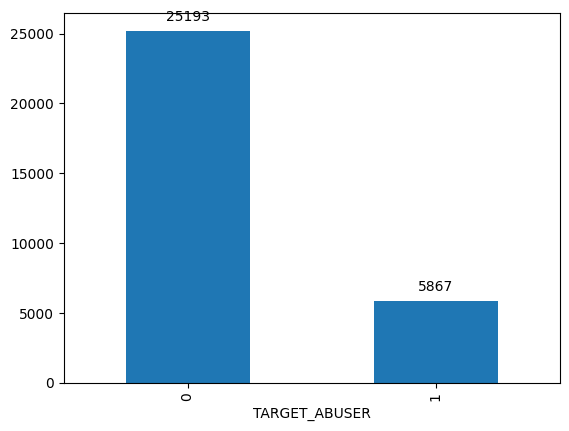

In [ ]:
#Checking the class balance for the output
bx = df['TARGET_ABUSER'].value_counts().plot(kind='bar')

# Add count values on top of the bars
for p in bx.patches:
                bx.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


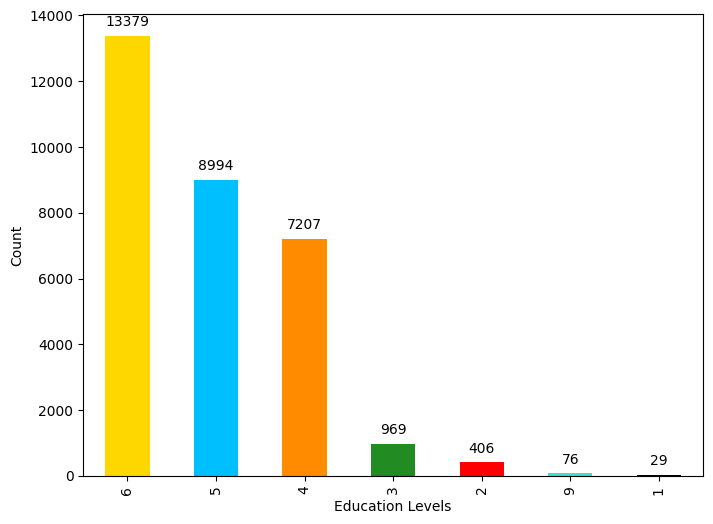

In [ ]:
#Checking the class balance for the output
plt.figure(figsize=(8, 6))
bx = df['EDUCA'].value_counts().plot(kind='bar', color=['gold','deepskyblue','darkorange','forestgreen','red','turquoise','black'],
                                     xlabel = 'Education Levels', ylabel = 'Count')

# Add count values on top of the bars
for p in bx.patches:
                bx.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


In [ ]:
#Categories of substance abuse
df['LEVEL_ABUSER'].value_counts()

LEVEL_ABUSER
0    25193
1     5221
2      604
3       42
Name: count, dtype: int64

In [ ]:

# Mapping to combine classes 2, 3, and 4 into a single class (class 2)
class_mapping = {2: 3, 3: 3, 4: 3}

# Replace values in the 'output_class' column
df['LEVEL_ABUSER'] = df['LEVEL_ABUSER'].replace(class_mapping)


In [ ]:
#Categories of substance abuse
df['LEVEL_ABUSER'].value_counts()

LEVEL_ABUSER
0    25193
1     5221
3      646
Name: count, dtype: int64

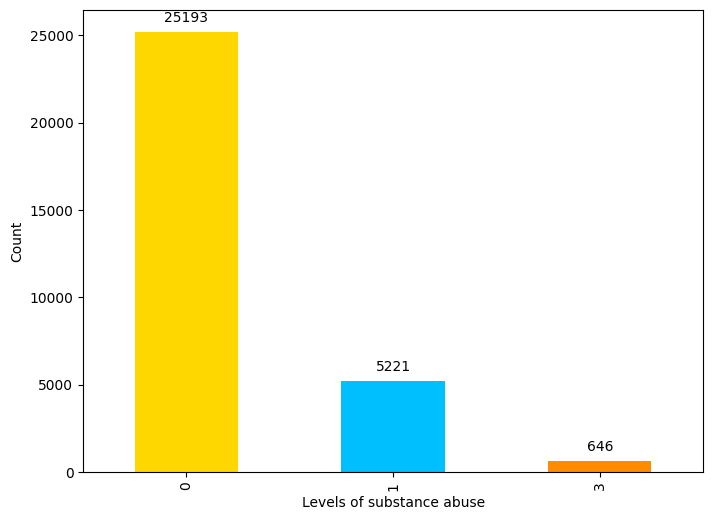

In [ ]:
# 0 - Non users, 1 - Moderate users, 2 - Problematic users, 3 - Severe users


#Checking the class balance for the output
plt.figure(figsize=(8, 6))
bx = df['LEVEL_ABUSER'].value_counts().plot(kind='bar', color=['gold','deepskyblue','darkorange','forestgreen','red','turquoise','black'],
                                     xlabel = 'Levels of substance abuse', ylabel = 'Count')

# Add count values on top of the bars
for p in bx.patches:
                bx.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


In [ ]:
df.shape

(31060, 106)

In [ ]:
# write the cleaned data frame to a new Excel file
df.to_excel("/content/drive/MyDrive/Capstone_Project/cleaned_sa_2021_2022.xlsx", index=False, header = True)